In [2]:
import pandas as pd
import numpy as np
#%display typeset

## Modelo SEIR 


$$\frac{dS}{dT}=-\lambda \cdot S(t) \cdot I(t)$$

$$\frac{dE}{dT}=\lambda \cdot S(t) \cdot I(t) - \alpha \cdot E(t) $$

$$\frac{dI}{dT}=\alpha \cdot E(t) - \gamma \cdot I(t)$$

$$\frac {dR}{dT}=\gamma \cdot I(t)$$

In [3]:
def ODE (t,y,params):
    S,E,I,R = y
    lam,alfa,gama = params
    return [-lam*S*I,
            lam*S*I - alfa*E,
            alfa*E - gama*I,
            gama*I ]

In [3]:
data = pd.read_csv("owid-covid-data.csv")
data = data[data.iso_code=="FRA"]
data = data[data.date>='2020-01-24'] # a partir da data do primeiro caso registrado
data.reset_index(inplace=True)

In [4]:
data

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,13445,FRA,Europe,France,2020-01-24,0.0,0.0,0.000,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
1,13446,FRA,Europe,France,2020-01-25,3.0,3.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
2,13447,FRA,Europe,France,2020-01-26,3.0,0.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
3,13448,FRA,Europe,France,2020-01-27,3.0,0.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
4,13449,FRA,Europe,France,2020-01-28,3.0,0.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,13666,FRA,Europe,France,2020-09-01,281025.0,3082.0,5167.286,30635.0,29.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
222,13667,FRA,Europe,France,2020-09-02,286007.0,4982.0,5407.000,30661.0,26.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
223,13668,FRA,Europe,France,2020-09-03,293024.0,7017.0,5633.857,30686.0,25.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
224,13669,FRA,Europe,France,2020-09-04,300181.0,7157.0,5783.286,30686.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66


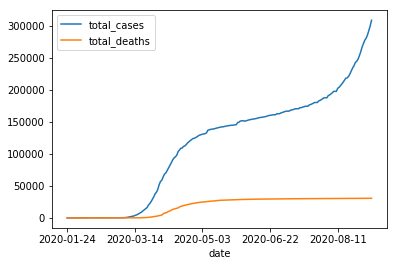

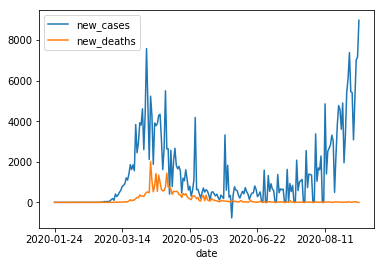

In [7]:
subnot=1
a =data.set_index('date')[['total_cases','total_deaths']].plot()
data.set_index('date')[['new_cases','new_deaths']].plot()

In [173]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim

In [237]:
T = ode_solver()
T.algorithm = "rk8pd"
T.function = ODE

def plot_results(params):
    popFRA = 67 * 10^6
    
    inits = [0.99,0,0.1,0]
    t_span=[0,len(data)]
    num_points=len(data)
    
    T.ode_solve(t_span, inits, num_points,params)
    t0=params[-1]
    sim = get_sim_array(T.solution)*10^6 ##falta ajustar,seria popFRA
    
    C = list_plot(data['total_cases'],color='green',legend_label='Cum. cases')
    D = list_plot(data['total_deaths'],color='blue', legend_label='Cum. Deaths')
    S = list_plot(sim[:,-4], color='orange',legend_label='S:sucetíveis', plotjoined=True)
    E = list_plot(sim[:,-3], color='green',legend_label='E:expostos', plotjoined=True)
    I = list_plot(sim[:,-2], color='purple',legend_label='I:infectados', plotjoined=True)
    R = list_plot(sim[:,-1], color='red',legend_label='R:recuperados e mortos', plotjoined=True)
    
    show(D+C+S+E+I+R)

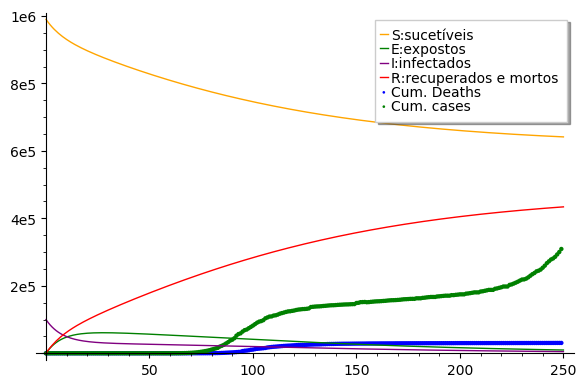

In [238]:
params=[0.09,0.04,0.09]
plot_results(params)